The cell below contains a simulation of a three reel slot machine. Each of the three reels contain a total of 72 symbols, and one reel has one '7' symbol, another has two '7' symbols, and the third has three '7'symbols. Above each of the three reels is a seven-segment bonus meter. Whenever a bonus 7 symbol lands on a reel it contributes to the bonus meter for its reel, increasing it by one. On a spin where all seven segments on all three reels are filled, the player is awarded a bonus of 200 coins and the bonus feature ends. All three meters are reset to zero for the next spin and a new bonus feature begins. If a 7 lands on a reel whose meter is full but the other meters are not completed, the player is awarded a bonus of 2 coins for that reel and the bonus feature continues.

The purpose of the program is to collect sample means for the number of spins needed to complete a bonus feature, and the number of coins won before the bonus feature ends. The number of desired sample means and the sample size is requested from the user, and the program returns the mean, standard deviation, and a histogram of both distributions.

Enter the number of sample means to be collected: 50000
Enter the sample size, that is, the number of bonus features: 5
The average number of spins from these samples is 512.57854 with standard deviation 80.67814568684881
The average number of coins from these samples is 43.420488 with standard deviation 12.132783070749102


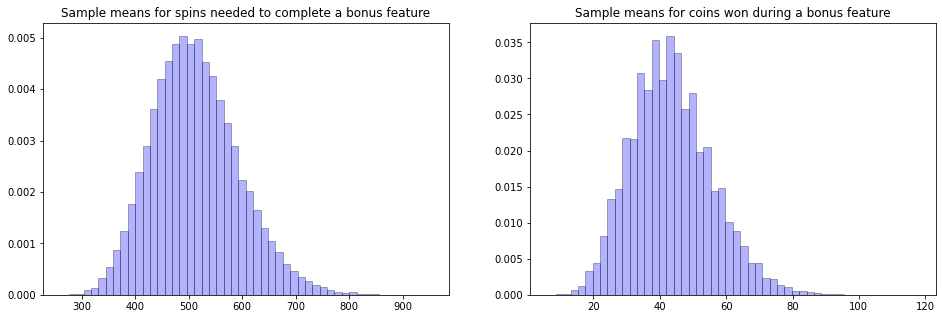

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

reel1 = 3*['7'] + 69*['0']
reel2 = 2*['7'] + 70*['0']
reel3 = ['7'] + 71*['0']
meter1, meter2, meter3 = 0, 0, 0
spins_sample_means = []
coins_sample_means = []

n = int(input('Enter the number of sample means to be collected: '))
k = int(input('Enter the sample size, that is, the number of bonus features: '))

for j in range(n): #number of sample means
    spins_samples = []
    coins_samples = []
    for i in range(k): #sample size
        spins = 0
        coins = 0
        while (meter1, meter2, meter3) != (7, 7, 7):
            reel1result = random.choices(reel1)
            reel2result = random.choices(reel2)
            reel3result = random.choices(reel3)
            if reel1result == ['7']:
                if meter1 < 7:
                    meter1 += 1
                else:
                    coins += 2
            if reel2result == ['7']:
                if meter2 < 7:
                    meter2 += 1
                else:
                    coins += 2
            if reel3result == ['7']:
                if meter3 < 7:
                    meter3 += 1
                else:
                    coins += 2
            spins += 1
        coins_samples += [coins]
        spins_samples += [spins]
        meter1, meter2, meter3 = 0, 0, 0
    spins_sample_means += [np.mean(np.array(spins_samples))]
    coins_sample_means += [np.mean(np.array(coins_samples))]

plt.rcParams['figure.figsize'] = (16,5)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].hist(np.array(spins_sample_means),
           bins = 50,
           density = True,
           alpha = 0.3,
           color = 'b',
           edgecolor = 'k')
ax[0].set_title('Sample means for spins needed to complete a bonus feature')
ax[1].hist(np.array(coins_sample_means),
           bins = 50,
           density = True,
           alpha = 0.3,
           color = 'b',
           edgecolor = 'k')
ax[1].set_title('Sample means for coins won during a bonus feature')
print('The average number of spins from these samples is ' + str(np.mean(np.array(spins_sample_means))) +
      ' with standard deviation ' + str(np.std(np.array(spins_sample_means))))
print('The average number of coins from these samples is ' + str(np.mean(np.array(coins_sample_means))) +
      ' with standard deviation ' + str(np.std(np.array(coins_sample_means))))